### Visualize the HMA region and the sub-regions

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import geopandas as gpd
from pyrsimg import readTiff
from matplotlib.colors import LinearSegmentedColormap
from utils.scale_bar import scale_bar
import numpy as np


In [2]:
path_hma_holch2019_regions = 'extents/HMA/hma_bolch2019_subregions.gpkg'
path_hma_holch2019 = 'extents/HMA/hma_bolch2019.gpkg'
path_tb_new2021 = 'extents/TPlateau/TPBoundary_new2021.gpkg'
path_srtm_down = 'dem/hma_SRTMGL3_down_100.tif' 


In [3]:
hma_holch2019 = gpd.read_file(path_hma_holch2019)
hma_regions = gpd.read_file(path_hma_holch2019_regions)
tibet_new2021 = gpd.read_file(path_tb_new2021)
hma_regions.head()


,himap_region,geometry
0,Eastern Hindu Kush,"MULTIPOLYGON (((73.45169 36.98397, 73.44597 36..."
1,Western Himalaya,"MULTIPOLYGON (((75.78745 35.31560, 75.78746 35..."
2,Eastern Himalaya,"MULTIPOLYGON (((95.22303 29.82187, 95.21352 29..."
3,Central Himalaya,"MULTIPOLYGON (((80.93560 30.70763, 80.98096 30..."
4,Karakoram,"MULTIPOLYGON (((75.87363 37.31180, 75.89061 37..."


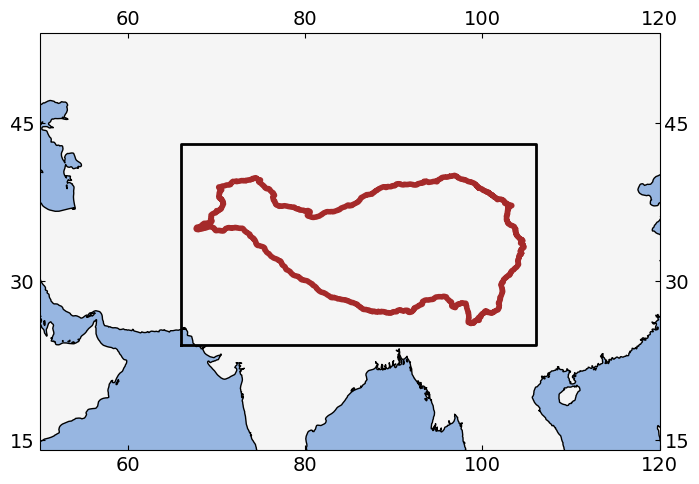

In [42]:
region = [66,106,24,43]
region_x = [region[0], region[1], region[1], region[0], region[0]]
region_y = [region[2], region[2], region[3], region[3], region[2]]
fig = plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size':14})
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.set_extent([55, 117, 13, 52.0])
ax.set_extent([50, 120, 14, 48.0])
### plot hma boundary
gridl = ax.gridlines(draw_labels=False, linewidth=0.)
tibet_new2021.plot(ax=ax, edgecolor='Brown', facecolor='none', linewidth=4)
### plot rectangle
plt.plot(region_x, region_y, transform=ccrs.PlateCarree(), linewidth=2, color='black')
ax.tick_params(labelbottom=True,  labeltop=True, labelleft=True, labelright=True,
                     bottom=True, top=True,      left=True, right=True, direction="in")                     
### plot auxlliary data
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, edgecolor='Black')

### set figure
ax.set_xticks([60, 80, 100, 120]);
ax.set_yticks([15, 30, 45]);
# gridl.xlabel_style = {'size': 14}
# gridl.ylabel_style = {'size': 14}


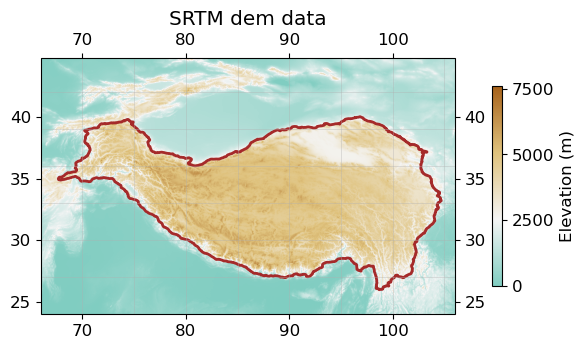

In [30]:
srtm_down = readTiff(path_srtm_down)
### visualize dem 
colors = [(128/255, 205/255, 193/255), (245/255, 245/255, 245/255), \
          (223/255, 194/255, 125/255), (166/255, 97/255, 26/255)]
cmap_dem = LinearSegmentedColormap.from_list('linear color', colors)
# fig = plt.figure(figsize=(4, 3))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([66, 106, 24, 43])
ax_img = ax.imshow(srtm_down.array, cmap=cmap_dem, clim=[0, 7600], alpha=1, extent=srtm_down.geoextent)
ax.set_title('SRTM dem data')
cbar = fig.colorbar(ax_img, ax=ax, fraction=0.03, pad=0.08, label='Elevation (m)', shrink=0.65, ticks=[0, 2500, 5000, 7500])
cbar.ax.tick_params(labelsize=12)

### Visualize vector
tibet_new2021.plot(ax=ax, edgecolor='Brown', facecolor='none', linewidth=2)
gridl = ax.gridlines(draw_labels=False, linewidth=0.5, alpha=0.5, zorder=1)
ax.set_xticks([70, 80, 90, 100])
ax.set_yticks([25, 30, 35, 40])
ax.tick_params(labelbottom=True,  labeltop=True, labelleft=True, labelright=True,
                     bottom=True, top=True,      left=True, right=True)                     
gridl.xlabel_style = {'size': 10}
gridl.ylabel_style = {'size': 10}
# ax.scatter(93.88, 38.87, s=200, color='red', marker='^')
# scale_bar(ax, length=300, location=(0.55, 0.04), linewidth=1)
